In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
axis_limits = {
    "x": np.array([
        0.0,
        25.0
    ]),
    "y":np.array([
        0.0,
        25.0
    ])
}

In [41]:
start_position = np.array([0.0, 0.0])
end_position = np.array([25.0, 25.0])

In [97]:
class Obstacle():
    def __init__(self, position, radius):
        self.position = position
        self.radius = radius
        
    def test(self, point):
        return np.linalg.norm(self.position-point) <= self.radius
        

def collision_checker(obstacle, position):
    #TODO simple check for collission   
    return obstacle.test(position)

In [134]:
# The obstacle
# obstacle_random_seed = 5
obstacle_position = (12.0, 12.0)
obstacle_radius = 5.0
obstacle = Obstacle(obstacle_position, obstacle_radius)

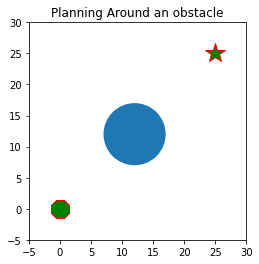

In [135]:
figure, axes = plt.subplots()
PlanningObstacle = plt.Circle(obstacle_position, obstacle_radius )
 
axes.set_aspect( 1 )

# plot start and end positions
plt.plot(*start_position, marker="8", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.plot(*end_position, marker="*", markersize=20, markeredgecolor="red", markerfacecolor="green")

axes.add_artist( PlanningObstacle )
padding = np.array([-5, 5])

plt.title( 'Planning Around an obstacle' )
plt.xlim(axis_limits['x'] + padding)
plt.ylim(axis_limits['y'] + padding)
plt.show()

In [55]:
def normalize_vector(v):
    return v / np.sqrt(np.sum(v**2))

def gaussian_sample(val, sigma):
    return np.random.normal(val, sigma)

In [140]:
# TODO this is the loop
step = 1
sigma = 0.5
num_samples = 3

max_turns = 50
turns = []


current_position = start_position
retry = False

# for turn in range(max_turns):
while np.linalg.norm(end_position - current_position):
    if len(turns) >= max_turns:
        print(f"failed to reach end_position after {len(turns)} turns")
        break
    
    turn = {
        'valid': [],
        'selected': None,
        'rejected': []
    }    
    
    # compute target-current position path_to_exit as a unit vector
    path_to_exit = end_position - current_position
    
    # SUCCESS stopping condition
    if np.linalg.norm(path_to_exit) <= step:
        print(f"Reached the end_position after {len(turns)} turns")
        turn['selected'] = end_position
        break
    else:  
        way_to_exit = normalize_vector(path_to_exit)

        sampler = lambda t: gaussian_sample(t, sigma)

        samples = [current_position + sampler(way_to_exit) for _ in range(num_samples)]

        # samples.sort(reverse=True, key=lambda s:end_position-s)
        samples.sort( key=lambda s:np.linalg.norm(end_position-s))


        # process samples         
        for _s in samples:
            if collision_checker(obstacle, _s):
                turn['rejected'].append(_s)
            else:
                if turn['selected'] is None:
                    turn['selected'] = _s
                else: 
                    turn['valid'].append(_s)

        # if there are no valid samples... increase variance and try again
        if turn['selected'] is not None:
            current_position = turn['selected']
            retry = False
            sigma = 1
        else:    
            print('retry')
            current_position = current_position
            retry = True
            sigma += 0.1
        
    turns.append(turn)

# if target within d, sample is simply at position d.. this is the penultimate position
# generate n samples along this path_to_exit by randomizing the parameters of the vector. rank them by proximity to the target
# foreach sample...
#    test for a collision
#.   if collision..
#.       just sort into two groups, colliding and otherwise
# if no non-colliding...
#.  increase sigma and try again
# if t

retry
retry
retry
Reached the end_position after 25 turns


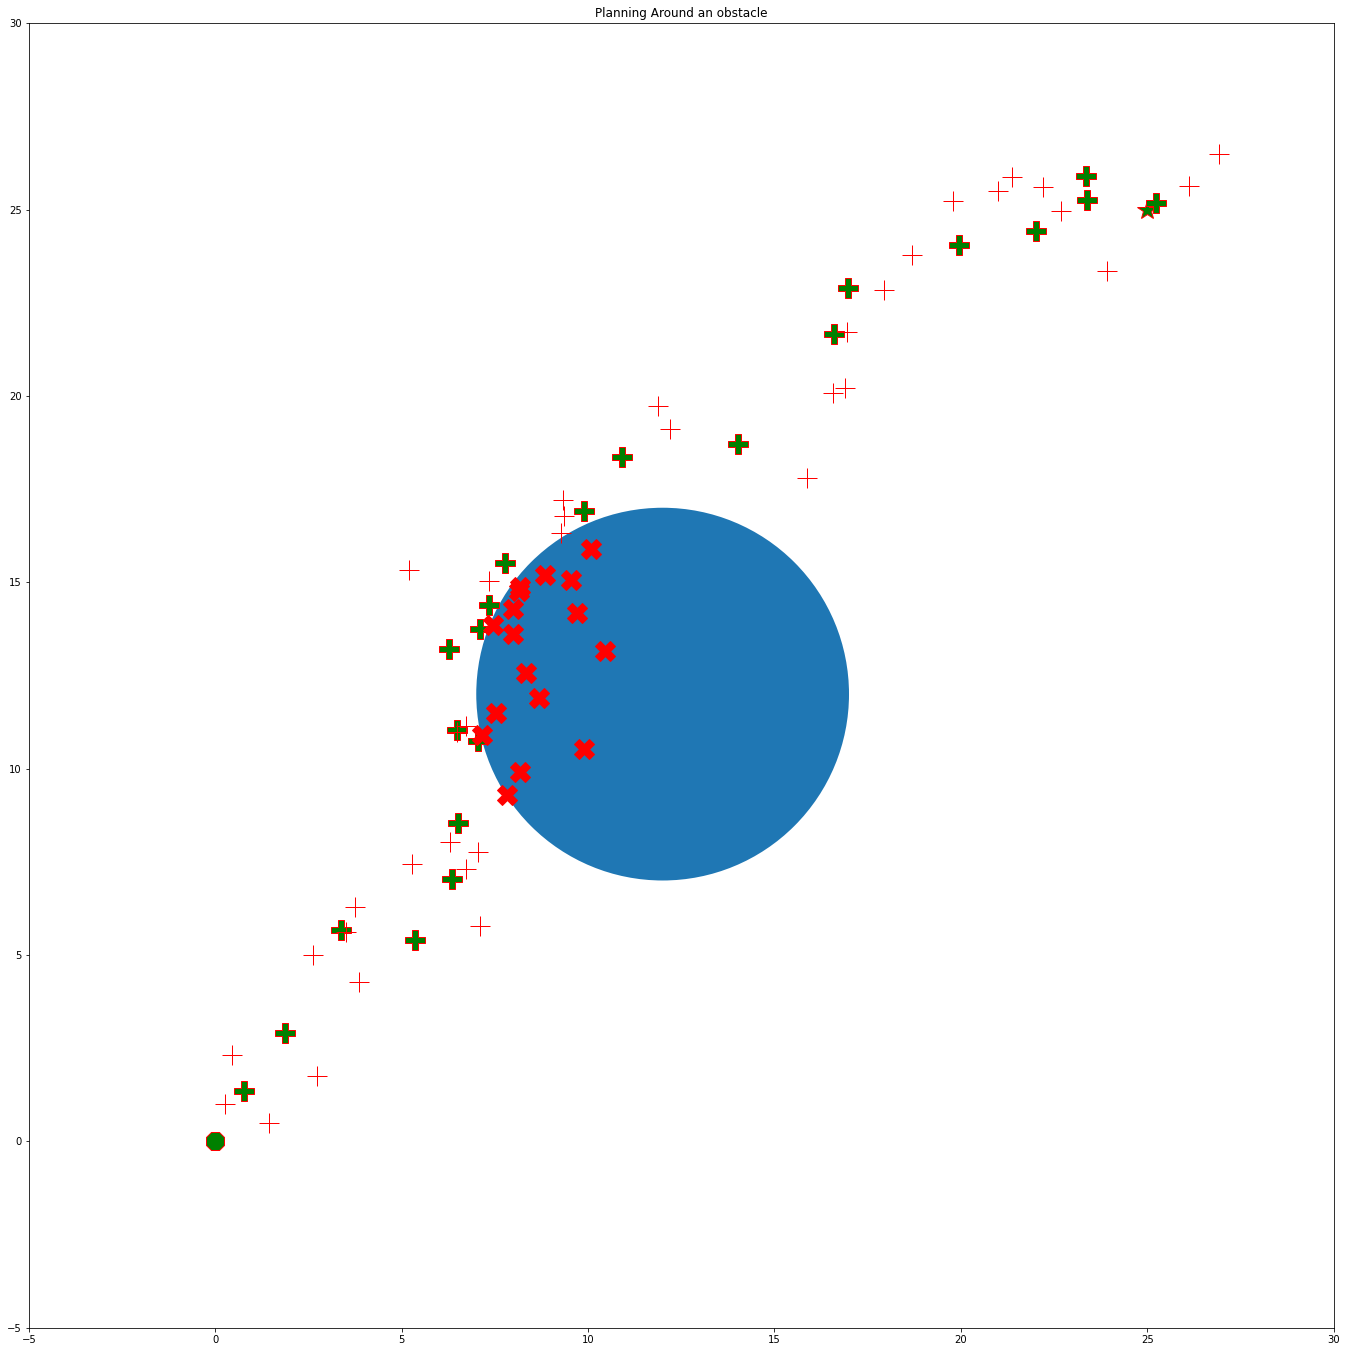

In [141]:
figure, axes = plt.subplots()
figure.set_size_inches(24, 24)
PlanningObstacle = plt.Circle(obstacle_position, obstacle_radius )
 
axes.set_aspect( 1 )

# plot start and end positions
plt.plot(*start_position, marker="8", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.plot(*end_position, marker="*", markersize=20, markeredgecolor="red", markerfacecolor="green")

for turn in turns:
    # plot the results of a turn
    if turn['selected'] is not None:
        plt.plot(*turn['selected'], marker="P", markersize=20, markeredgecolor="red", markerfacecolor="green")
    for _s in turn['valid']:
        plt.plot(*_s, marker="+", markersize=20, markeredgecolor="red", markerfacecolor="green")
    for _s in turn['rejected']:
        plt.plot(*_s, marker="X", markersize=20, markeredgecolor="red", markerfacecolor="red")


axes.add_artist( PlanningObstacle )
padding = np.array([-5, 5])

plt.title( 'Planning Around an obstacle' )
plt.xlim(axis_limits['x'] + padding)
plt.ylim(axis_limits['y'] + padding)
plt.show()

